In [ ]:
import requests
import os
import time
os.chdir('data')
header={'User-Agent':'FireFox android'}
img_url = 'http://www.hbcredit.gov.cn/credithb/public/validata.jpg?codeType=gkgssearch_left&r=0.8530701724309786'
for i in range(914,10000):
    r = requests.get(img_url,headers=header)
    with open('{}.jpg'.format(i),'wb') as f:
        f.write(r.content)
#         time.sleep(1)

In [28]:
from PIL import Image
import os
import time
# os.chdir('data')
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import re

In [ ]:
im = Image.open('2.jpg')

In [ ]:
plt.imshow(im)

In [ ]:
im=im.convert('L')

In [ ]:
np_im =np.array(im)

In [ ]:
np_im.shape

In [ ]:
np_im[0][0]

In [ ]:
ret2,th2 = cv2.threshold(np_im,127,255,cv2.THRESH_BINARY)

In [ ]:
plt.imshow(th2)

In [ ]:
(new_img,contours,hiera)=cv2.findContours(th2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
w1,h1=im.size

In [ ]:
cnts=[]

for idx,c in enumerate(contours):
    (x,y,w,h)=cv2.boundingRect(c)
#     print(x,y,w,h)
    if w>5 and w<25:
        cnts.append(th2[0:h1,x-1:x+w+1])

In [ ]:
len(cnts)

In [ ]:
# cnts = sorted([(c,cv2.boundingRect(c)[0]) for c in contours],key=lambda x:x[1])

In [ ]:
ret=[]
for (c,_) in cnts:
    (x,y,w,h)=cv2.boundingRect(c)
#     print(x,y,w,h)
    if w>5 and w<25:
        cnts.append(th2[y-1:y+h+1,x-1:x+w+1])

In [ ]:
plt.imshow(cnts[4])

In [ ]:
s =cv2.findContours(th2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# 识别
import os
import time
os.chdir('train')

In [ ]:
path=os.getcwd()

In [ ]:
data=[]
lable=[]

for file in os.listdir('.'):
    im = Image.open(file).convert('L')
    np_im = np.array(im)
    ret2,th2 = cv2.threshold(np_im,200,255,cv2.THRESH_BINARY)
    if re.search('-',file):
        lb = file.split('-')[0]
    else:
        lb=file.split('.')[0]

        
    lable.append(lb)
    data.append(th2)

In [ ]:
len(data)

In [ ]:
plt.imshow(data[0])

In [ ]:
data[0]

In [ ]:
np_dataset = np.array(data)

In [ ]:
np_dataset.shape

In [ ]:
np_labels=np.array(lable)

In [ ]:
X=np_dataset.copy()

In [ ]:
y=np_labels.copy()

In [ ]:
from sklearn.cross_validation import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
import pandas as pd
from keras.models import load_model

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train_4D = X_train.reshape(X_train.shape[0],85,35,1).astype('float32')
X_test_4D = X_test.reshape(X_test.shape[0],85,35,1).astype('float32')
X_train_4D_normal=X_train_4D/255
X_test_4D_normal=X_test_4D/255
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [ ]:
len(X_train)

In [ ]:
len(y_train)

In [ ]:
y_train[0]

In [ ]:
y_train_onehot[0]

In [ ]:
len(y_train_onehot[0])

In [ ]:
model = Sequential()
model.add(
   Conv2D(
   filters=85,
   kernel_size=(5,5),
   padding='same',
   input_shape=(85,35,1),
   activation='relu',
   )
)

model.add(
MaxPooling2D(pool_size=(2,2))
)

model.add(
Conv2D(
filters=36,
    kernel_size=(5,5),
    padding='same',
    activation='relu',
)
)

model.add(
MaxPooling2D(pool_size=(2,2))
)

model.add(Dropout(0.25))
model.add(Flatten())

model.add(
Dense(
128,activation='relu'
)
)

model.add(Dropout(0.5))

model.add(
Dense(
8888,
    activation='softmax'
)
)

model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
history_train = model.fit(x=X_train_4D_normal,
                         y=y_train_onehot,
                         validation_split=0.2,
                          epochs=100,
                          batch_size=50,
                          verbose = 2,
                         )

In [4]:
os.chdir('data')

In [5]:
# 图片重新切割
img=cv2.imread('564.jpg')
# cv2.show('1',img)
img_grey=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh,new_img = cv2.threshold(img_grey,200,255,0)

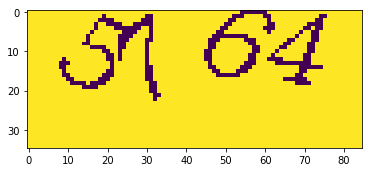

In [6]:
plt.imshow(new_img)

In [7]:
im2, contours, hierarchy = cv2.findContours(new_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [4]:
def get_rect_box(contours):
    ws = []
    valid_contours = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w < 7:
            continue
        valid_contours.append(contour)
        ws.append(w)

    w_min = min(ws)
    w_max = max(ws)

    result = []
    if len(valid_contours) == 4:
        for contour in valid_contours:
            x, y, w, h = cv2.boundingRect(contour)
            box = np.int0([[x,y], [x+w,y], [x+w,y+h], [x,y+h]])
            result.append(box)
    elif len(valid_contours) == 3:
        for contour in valid_contours:
            x, y, w, h = cv2.boundingRect(contour)
            if w == w_max:
                box_left = np.int0([[x,y], [x+w/2,y], [x+w/2,y+h], [x,y+h]])
                box_right = np.int0([[x+w/2,y], [x+w,y], [x+w,y+h], [x+w/2,y+h]])
                result.append(box_left)
                result.append(box_right)
            else:
                box = np.int0([[x,y], [x+w,y], [x+w,y+h], [x,y+h]])
                result.append(box)
    elif len(valid_contours) == 2:
        for contour in valid_contours:
            x, y, w, h = cv2.boundingRect(contour)
            if w == w_max and w_max >= w_min * 2:
                box_left = np.int0([[x,y], [x+w/3,y], [x+w/3,y+h], [x,y+h]])
                box_mid = np.int0([[x+w/3,y], [x+w*2/3,y], [x+w*2/3,y+h], [x+w/3,y+h]])
                box_right = np.int0([[x+w*2/3,y], [x+w,y], [x+w,y+h], [x+w*2/3,y+h]])
                result.append(box_left)
                result.append(box_mid)
                result.append(box_right)
            elif w_max < w_min * 2:
                box_left = np.int0([[x,y], [x+w/2,y], [x+w/2,y+h], [x,y+h]])
                box_right = np.int0([[x+w/2,y], [x+w,y], [x+w,y+h], [x+w/2,y+h]])
                result.append(box_left)
                result.append(box_right)
            else:
                box = np.int0([[x,y], [x+w,y], [x+w,y+h], [x,y+h]])
                result.append(box)
    elif len(valid_contours) == 1:
        contour = valid_contours[0]
        x, y, w, h = cv2.boundingRect(contour)
        box0 = np.int0([[x,y], [x+w/4,y], [x+w/4,y+h], [x,y+h]])
        box1 = np.int0([[x+w/4,y], [x+w*2/4,y], [x+w*2/4,y+h], [x+w/4,y+h]])
        box2 = np.int0([[x+w*2/4,y], [x+w*3/4,y], [x+w*3/4,y+h], [x+w*2/4,y+h]])
        box3 = np.int0([[x+w*3/4,y], [x+w,y], [x+w,y+h], [x+w*3/4,y+h]])
        result.extend([box0, box1, box2, box3])
    elif len(valid_contours) > 4:
        for contour in valid_contours:
            x, y, w, h = cv2.boundingRect(contour)
            box = np.int0([[x,y], [x+w,y], [x+w,y+h], [x,y+h]])
            result.append(box)
    result = sorted(result, key=lambda x: x[0][0])
    return result

In [50]:
def read_file(filename):
    label = re.findall('(\d)',filename.split('\\')[-1])
    if len(label) < 4:
        return
    im=cv2.imread(filename)
    rows, cols, ch = im.shape
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    ret, im_inv = cv2.threshold(im_gray,220,255,cv2.THRESH_BINARY_INV)
    new_im = cv2.GaussianBlur(im_inv,(3,3),0)
    ret, im_inv = cv2.threshold(im_gray,220,255,cv2.THRESH_BINARY_INV)
    im2, contours, hierarchy = cv2.findContours(im_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boxes=get_rect_box(contours)
    if len(boxes)!=4:
        return
    for index,box in enumerate(boxes):
        roi = im_inv[:, box[0][0]:box[1][0]]
        new_i=cv2.resize(roi,(20,35))
        ret, new_i = cv2.threshold(new_i,1,255,cv2.THRESH_BINARY_INV)

    #     plt.figure(figsize=(10,10))
    #     plt.subplot(1,4,index+1)
    #     plt.imshow(new_i)
    #     t=time.time()
        folder=os.path.join(base_dir,label[index])
        file = os.path.join(folder,'{}.jpg'.format(int(time.time()*100)))
        cv2.imwrite(file,new_i)

In [51]:
import re
import os
# os.chdir('train')
base_dir = r'E:\git\image_recognise\xinyonghubei'
train_folder = os.path.join(base_dir,'train')
for filename in os.listdir(train_folder):
#     print(filename)
#     read_file(filename)
    read_file(os.path.join(base_dir,'train',filename))
#     print(filename)
    

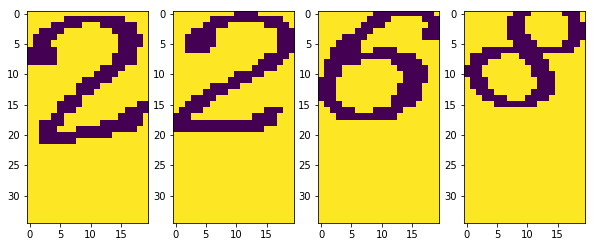

In [49]:
filename=r'E:\git\image_recognise\xinyonghubei\train\2268.jpg'
label = re.findall('(\d)',filename.split('\\')[-1])

im=cv2.imread(filename)
rows, cols, ch = im.shape
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, im_inv = cv2.threshold(im_gray,220,255,cv2.THRESH_BINARY_INV)
new_im = cv2.GaussianBlur(im_inv,(3,3),0)
ret, im_inv = cv2.threshold(im_gray,220,255,cv2.THRESH_BINARY_INV)
im2, contours, hierarchy = cv2.findContours(im_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
boxes=get_rect_box(contours)
# plt.figure(figsize=(10,10))

for index,box in enumerate(boxes):
    roi = im_inv[:, box[0][0]:box[1][0]]
    new_i=cv2.resize(roi,(20,35))
    ret, new_i = cv2.threshold(new_i,1,255,cv2.THRESH_BINARY_INV)

#     plt.figure(figsize=(10,10))
#     plt.subplot(1,4,index+1)
#     plt.imshow(new_i)
#     t=time.time()
    folder=os.path.join(base_dir,label[index])
    file = os.path.join(folder,'{}.jpg'.format(int(time.time()*100)))
    cv2.imwrite(file,new_i)

In [309]:
os.chdir(r'E:\git\image_recognise\xinyonghubei\sample')

In [310]:
labels=os.listdir('.')

In [311]:
labels

['2', '3', '4', '5', '6', '7', '8']

In [312]:
datasets=[]
labels=[]
sample_size = 300
path=r'E:\git\image_recognise\xinyonghubei\sample'
for num in range(2,9):
    full_path = os.path.join(path,str(num))
    for file in os.listdir(full_path)[:sample_size]:
        img_path = os.path.join(full_path,file)
#         img=cv2.imread(img_path)
        
        img = Image.open(img_path).convert('L')
        w,h=img.shape
        pixels = list(img.getdata())
#         bw_np_img = list(map(lambda x:1 if x>127 else 0,pixels))
        datasets.append(pixels)
        labels.append(num)

In [205]:
len(datasets)

910

In [365]:
datasets[0]

[255,
 253,
 255,
 255,
 253,
 255,
 255,
 254,
 255,
 255,
 255,
 255,
 255,
 253,
 255,
 254,
 255,
 255,
 251,
 255,
 255,
 255,
 254,
 254,
 255,
 254,
 254,
 255,
 2,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 255,
 254,
 255,
 252,
 255,
 255,
 253,
 255,
 254,
 1,
 0,
 4,
 0,
 1,
 3,
 254,
 0,
 2,
 0,
 1,
 0,
 1,
 3,
 255,
 253,
 254,
 255,
 253,
 0,
 0,
 1,
 0,
 255,
 253,
 255,
 252,
 255,
 253,
 255,
 1,
 2,
 0,
 0,
 255,
 255,
 253,
 0,
 3,
 0,
 255,
 255,
 254,
 255,
 255,
 255,
 252,
 254,
 255,
 255,
 254,
 1,
 1,
 0,
 0,
 255,
 0,
 1,
 3,
 0,
 255,
 253,
 255,
 254,
 253,
 255,
 255,
 253,
 253,
 254,
 255,
 0,
 1,
 2,
 0,
 252,
 5,
 0,
 0,
 1,
 0,
 255,
 255,
 255,
 252,
 255,
 255,
 255,
 255,
 254,
 255,
 0,
 0,
 0,
 1,
 255,
 0,
 1,
 0,
 0,
 255,
 253,
 254,
 255,
 255,
 255,
 254,
 255,
 255,
 255,
 0,
 0,
 1,
 0,
 255,
 255,
 255,
 255,
 254,
 255,
 255,
 254,
 255,
 255,
 255,
 255,
 255,
 254,
 255,
 254,
 0,
 0,
 0,
 1,
 254,
 253,
 255,
 252,
 255,
 252,
 255,
 255,
 254,
 2

In [313]:
import numpy as np

In [314]:
np_datasets=np.array(datasets)

In [315]:
np_labels = np.array(labels)

In [316]:
np_datasets.shape

(2100, 700)

In [317]:
np_labels.shape

(2100,)

In [318]:
x=np_datasets.reshape(2100,h,w)

In [319]:
x.shape

(2100, 35, 20)

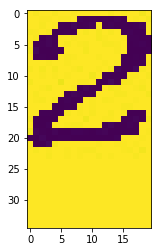

In [320]:
plt.imshow(x[0])

In [321]:
X=x.copy()
y=np_labels.copy()

In [322]:
from sklearn.cross_validation import train_test_split

In [323]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [324]:
X_train_4D = X_train.reshape(X_train.shape[0],h,w,1).astype('float32')
X_test_4D = X_test.reshape(X_test.shape[0],h,w,1).astype('float32')

In [325]:
X_train_4D_normal=X_train_4D/255
X_test_4D_normal=X_test_4D/255

In [326]:
from keras.utils import np_utils

In [327]:
y_train_onehot = np_utils.to_categorical(y_train,num_classes=9)
y_test_onehot = np_utils.to_categorical(y_test,num_classes=9)

In [328]:
len(y_train)

1680

In [329]:
len(labels)

2100

In [150]:
set(labels)

{'2', '3', '4', '5', '6', '7', '8'}

In [151]:
len(y_train_onehot)

728

In [169]:
y_train_onehot[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [330]:
from keras.models import Sequential

In [331]:
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [332]:
model = Sequential()

In [333]:
model.add(
   Conv2D(
   filters=16,
   kernel_size=(5,5),
   padding='same',
   input_shape=(h,w,1),
   activation='relu',
   )
)

In [334]:
model.add(
MaxPooling2D(pool_size=(2,2))
)

In [335]:
model.add(
Conv2D(
filters=36,
    kernel_size=(5,5),
    padding='same',
    activation='relu',
)
)

In [336]:
model.add(
MaxPooling2D(pool_size=(2,2))
)

In [337]:
model.add(Dropout(0.25))

In [338]:
model.add(Flatten())

In [339]:
model.add(
Dense(
128,activation='relu'
)
)

In [340]:
model.add(Dropout(0.5))

In [341]:
model.add(
Dense(
9,
    activation='softmax'
)
)

In [342]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 35, 20, 16)        416       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 10, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 17, 10, 36)        14436     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 5, 36)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 8, 5, 36)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1440)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               184448    
__________

In [343]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [344]:
history_train = model.fit(x=X_train_4D_normal,
                         y=y_train_onehot,
                         validation_split=0.2,
                          epochs=10,
                          batch_size=100,
                          verbose = 2,
                         )

Train on 1344 samples, validate on 336 samples
Epoch 1/10
 - 43s - loss: 2.0728 - acc: 0.1466 - val_loss: 1.8853 - val_acc: 0.4643
Epoch 2/10
 - 38s - loss: 1.8194 - acc: 0.2790 - val_loss: 1.4990 - val_acc: 0.5923
Epoch 3/10
 - 36s - loss: 1.3889 - acc: 0.5082 - val_loss: 0.9018 - val_acc: 0.8065
Epoch 4/10
 - 36s - loss: 0.9516 - acc: 0.6741 - val_loss: 0.5142 - val_acc: 0.8601
Epoch 5/10
 - 37s - loss: 0.6545 - acc: 0.7969 - val_loss: 0.3338 - val_acc: 0.9345
Epoch 6/10
 - 37s - loss: 0.4828 - acc: 0.8549 - val_loss: 0.2253 - val_acc: 0.9524
Epoch 7/10
 - 35s - loss: 0.3744 - acc: 0.8914 - val_loss: 0.1568 - val_acc: 0.9613
Epoch 8/10
 - 36s - loss: 0.3035 - acc: 0.9152 - val_loss: 0.1262 - val_acc: 0.9613
Epoch 9/10
 - 37s - loss: 0.2309 - acc: 0.9397 - val_loss: 0.1179 - val_acc: 0.9762
Epoch 10/10
 - 35s - loss: 0.1996 - acc: 0.9427 - val_loss: 0.1007 - val_acc: 0.9702


In [345]:
score = model.evaluate(X_test_4D_normal,y_test_onehot)

420/420 [==============================] - 0s 505us/step


In [346]:
score

[0.09991989401834352, 0.9714285714285714]

In [376]:
prediction = model.predict_classes(X_test_4D_normal)

In [377]:
prediction

array([4, 6, 8, 5, 7, 2, 6, 2, 7, 7, 6, 6, 2, 5, 6, 8, 5, 3, 4, 4, 8, 6,
       4, 2, 4, 7, 8, 3, 8, 4, 6, 6, 6, 7, 7, 2, 2, 6, 3, 2, 6, 2, 2, 7,
       5, 4, 6, 2, 8, 4, 8, 7, 2, 3, 2, 7, 3, 8, 7, 2, 6, 5, 3, 6, 5, 6,
       2, 6, 4, 6, 3, 3, 2, 6, 7, 8, 8, 8, 8, 8, 8, 2, 2, 7, 2, 6, 7, 8,
       3, 3, 6, 3, 8, 2, 5, 6, 4, 3, 6, 5, 5, 4, 8, 8, 3, 8, 4, 5, 6, 4,
       2, 4, 6, 4, 8, 4, 8, 2, 2, 4, 6, 2, 7, 6, 3, 5, 5, 5, 5, 7, 2, 5,
       7, 4, 5, 8, 7, 3, 3, 4, 6, 2, 8, 5, 6, 6, 4, 3, 5, 4, 6, 3, 8, 8,
       7, 8, 4, 2, 5, 5, 2, 3, 4, 4, 4, 5, 5, 4, 5, 8, 8, 8, 5, 3, 2, 5,
       4, 4, 7, 4, 5, 3, 4, 4, 6, 6, 3, 6, 8, 5, 5, 2, 7, 8, 3, 2, 7, 3,
       3, 6, 7, 7, 7, 3, 5, 5, 3, 4, 8, 3, 6, 8, 4, 5, 3, 3, 2, 6, 3, 7,
       4, 7, 8, 4, 3, 6, 3, 3, 2, 7, 8, 2, 3, 3, 8, 4, 4, 4, 4, 3, 8, 7,
       4, 4, 2, 3, 4, 7, 8, 3, 5, 4, 2, 3, 6, 6, 7, 8, 6, 2, 4, 5, 4, 6,
       2, 8, 2, 5, 2, 2, 5, 2, 2, 8, 7, 7, 3, 6, 2, 3, 2, 8, 8, 8, 8, 2,
       3, 8, 2, 4, 5, 3, 6, 7, 3, 8, 6, 4, 3, 8, 4,

In [349]:
y_test

array([4, 6, 8, 5, 7, 2, 6, 2, 7, 7, 6, 6, 2, 5, 6, 8, 5, 3, 4, 4, 8, 6,
       4, 2, 4, 7, 8, 3, 8, 4, 6, 6, 6, 7, 7, 2, 2, 6, 3, 2, 6, 2, 2, 7,
       5, 4, 6, 2, 8, 4, 8, 7, 2, 3, 2, 7, 3, 8, 7, 2, 6, 5, 3, 6, 5, 6,
       2, 6, 4, 6, 3, 3, 2, 6, 7, 8, 8, 8, 8, 6, 8, 2, 2, 7, 2, 6, 7, 8,
       3, 3, 6, 5, 8, 2, 5, 6, 4, 3, 6, 5, 5, 4, 3, 8, 3, 8, 4, 5, 6, 4,
       2, 4, 6, 8, 8, 4, 8, 2, 2, 4, 6, 2, 7, 6, 3, 5, 5, 5, 5, 7, 2, 5,
       7, 4, 5, 8, 7, 3, 8, 4, 6, 2, 8, 5, 6, 6, 4, 3, 5, 4, 6, 3, 8, 8,
       7, 8, 4, 2, 5, 5, 2, 3, 4, 4, 4, 5, 5, 4, 5, 8, 8, 8, 5, 3, 2, 5,
       4, 4, 7, 4, 5, 3, 4, 4, 6, 6, 3, 6, 8, 6, 5, 2, 7, 8, 3, 2, 7, 3,
       3, 6, 7, 7, 7, 3, 5, 5, 3, 4, 8, 3, 8, 8, 4, 5, 3, 3, 2, 6, 3, 7,
       4, 7, 8, 4, 3, 6, 3, 3, 2, 7, 8, 2, 8, 3, 8, 4, 4, 4, 4, 3, 8, 7,
       4, 4, 2, 3, 4, 7, 8, 3, 5, 4, 2, 3, 6, 6, 7, 8, 6, 2, 4, 5, 4, 6,
       2, 8, 2, 5, 2, 2, 5, 2, 2, 8, 7, 7, 3, 6, 2, 8, 2, 8, 8, 8, 8, 2,
       3, 8, 2, 4, 5, 3, 6, 7, 3, 8, 6, 4, 3, 8, 4,

In [375]:
import pandas as pd
pd.crosstab(y_test,prediction)

col_0,2,3,4,5,6,7,8
row_0,,,,,,,
2,64,0,0,0,0,0,0
3,0,57,0,1,0,0,1
4,0,0,65,0,0,0,0
5,0,2,0,49,0,0,0
6,0,0,0,1,64,0,1
7,0,0,0,0,0,48,0
8,0,4,1,0,1,0,61


In [191]:
y_train

array(['5', '2', '4', '5', '4', '6', '7', '6', '6', '7', '4', '4', '2',
       '6', '7', '4', '5', '4', '6', '4', '8', '7', '3', '5', '8', '7',
       '5', '2', '5', '2', '4', '5', '2', '8', '3', '5', '8', '7', '8',
       '5', '3', '7', '2', '8', '6', '8', '8', '2', '7', '2', '8', '8',
       '3', '5', '4', '5', '6', '3', '2', '8', '7', '6', '7', '8', '8',
       '7', '2', '8', '3', '5', '8', '8', '7', '4', '6', '3', '2', '5',
       '2', '3', '5', '8', '3', '5', '8', '6', '8', '3', '7', '2', '2',
       '5', '5', '2', '4', '3', '2', '2', '4', '7', '6', '7', '6', '3',
       '3', '8', '8', '5', '4', '6', '6', '5', '4', '3', '3', '3', '6',
       '5', '3', '6', '5', '4', '8', '4', '4', '2', '2', '8', '6', '6',
       '6', '5', '8', '6', '3', '5', '7', '6', '2', '7', '7', '4', '8',
       '5', '3', '7', '7', '8', '8', '8', '3', '4', '6', '8', '7', '7',
       '5', '2', '3', '2', '5', '8', '5', '3', '6', '7', '4', '2', '3',
       '3', '3', '2', '2', '4', '2', '3', '4', '5', '5', '2', '3

In [224]:
b = [0,2,3,5,6,7,8]

In [232]:
c=np_utils.to_categorical(b,10)

In [233]:
c

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [227]:
len(c[0])

9

In [ ]:


    #计算向量中每个类别值在最终生成的矩阵“压扁”后的向量里的位置
    index_offset = np.arange(num_labels) * num_classes
    #遍历矩阵，为每个类别的位置填充1
    labels_one_hot.flat[index_offset + labels] = 1



In [242]:
labels=[1,2,9]
num_classes=9
num_labels = len(labels)
#生成值全为0的独热编码的矩阵
labels_one_hot = np.zeros((num_labels, num_classes))

In [243]:
labels_one_hot

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [244]:
index_offset = np.arange(num_labels) * num_classes

In [245]:
index_offset

array([ 0,  9, 18])

In [240]:
np.arange(3)

array([0, 1, 2])

In [246]:
labels_one_hot.flat[index_offset + labels]=1

IndexError: index 27 is out of bounds for size 27

In [247]:

def convert_to_one_hot(labels, num_classes):
    #计算向量有多少行
    num_labels = len(labels)
    #生成值全为0的独热编码的矩阵
    labels_one_hot = np.zeros((num_labels, num_classes))
    #计算向量中每个类别值在最终生成的矩阵“压扁”后的向量里的位置
    index_offset = np.arange(num_labels) * num_classes
    #遍历矩阵，为每个类别的位置填充1
    labels_one_hot.flat[index_offset + labels] = 1
    return labels_one_hot

In [252]:
b = [2, 4, 6]
print(convert_to_one_hot(b,4))

IndexError: index 14 is out of bounds for size 12

In [306]:
def read_file_cut(filename):
#     label = re.findall('(\d)',filename.split('\\')[-1])
#     if len(label) < 4:
#         return
    base_dir=r'E:\git\image_recognise\xinyonghubei\cut'
    im=cv2.imread(filename)
    if im is None:
        return
    rows, cols, ch = im.shape
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    ret, im_inv = cv2.threshold(im_gray,220,255,cv2.THRESH_BINARY_INV)
    new_im = cv2.GaussianBlur(im_inv,(3,3),0)
    ret, im_inv = cv2.threshold(im_gray,220,255,cv2.THRESH_BINARY_INV)
    im2, contours, hierarchy = cv2.findContours(im_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boxes=get_rect_box(contours)
    if len(boxes)!=4:
        return
    for index,box in enumerate(boxes):
        roi = im_inv[:, box[0][0]:box[1][0]]
        new_i=cv2.resize(roi,(20,35))
        ret, new_i = cv2.threshold(new_i,1,255,cv2.THRESH_BINARY_INV)

    #     plt.figure(figsize=(10,10))
    #     plt.subplot(1,4,index+1)
    #     plt.imshow(new_i)
    #     t=time.time()
#         folder=os.path.join(base_dir,label[index])
        file = os.path.join(base_dir,'{}{}.jpg'.format(int(time.time()*1000),str(random.randint(1,10000))))
        cv2.imwrite(file,new_i)

In [307]:
import re
import os
import random
base_dir = r'E:\git\image_recognise\xinyonghubei\cut'
for filename in os.listdir(base_dir):
    read_file_cut(os.path.join(base_dir,filename))


In [384]:
# 用来预测
base_dir=r'E:\git\image_recognise\xinyonghubei\data'
filename=r'E:\git\image_recognise\xinyonghubei\data\5165.jpg'
im=cv2.imread(filename)

rows, cols, ch = im.shape
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, im_inv = cv2.threshold(im_gray,220,255,cv2.THRESH_BINARY_INV)
new_im = cv2.GaussianBlur(im_inv,(3,3),0)
ret, im_inv = cv2.threshold(im_gray,220,255,cv2.THRESH_BINARY_INV)
im2, contours, hierarchy = cv2.findContours(im_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
boxes=get_rect_box(contours)

for index,box in enumerate(boxes):
    roi = im_inv[:, box[0][0]:box[1][0]]
    new_i=cv2.resize(roi,(20,35))
    ret, new_i = cv2.threshold(new_i,1,255,cv2.THRESH_BINARY_INV)
#     print(new_i)
#     plt.figure(figsize=(10,10))
#     plt.subplot(1,4,index+1)
#     plt.imshow(new_i)
#     t=time.time()
#         folder=os.path.join(base_dir,label[index])
    file = os.path.join(base_dir,'{}.jpg'.format(index))
    cv2.imwrite(file,new_i)
    pil_img = Image.open(file).convert('L')
    w,h=pil_img.size
    data_list=[]
    pixels = list(pil_img.getdata())
    data_list.append(pixels)
    np_datalist=np.array(data_list)
    np_datalist=np_datalist.reshape(1,h,w)
#     X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
    X_train_4Ds = np_datalist.reshape(np_datalist.shape[0],h,w,1).astype('float32')
# X_test_4D = X_test.reshape(X_test.shape[0],85,35,1).astype('float32')
    X_train_4Ds=X_train_4Ds/255
    ret=model.predict_classes(X_train_4Ds)
    print(ret[0],end='')
    

2784

In [358]:
p_img=Image.open(r'E:\git\image_recognise\xinyonghubei\data\0.jpg').convert('L')

In [385]:
model.save('hubei.h5')

In [359]:
pixels = list(p_img.getdata())

In [360]:
pixels

[254,
 255,
 251,
 255,
 255,
 255,
 253,
 255,
 255,
 252,
 255,
 253,
 255,
 255,
 255,
 255,
 255,
 254,
 255,
 254,
 255,
 250,
 255,
 254,
 252,
 255,
 255,
 255,
 255,
 255,
 253,
 3,
 0,
 0,
 2,
 0,
 0,
 4,
 0,
 255,
 255,
 255,
 251,
 255,
 255,
 255,
 252,
 0,
 0,
 2,
 0,
 0,
 0,
 251,
 255,
 255,
 255,
 0,
 0,
 4,
 252,
 254,
 255,
 253,
 255,
 254,
 255,
 0,
 0,
 2,
 0,
 252,
 255,
 255,
 255,
 251,
 255,
 254,
 0,
 1,
 255,
 253,
 255,
 254,
 253,
 255,
 0,
 1,
 1,
 0,
 1,
 255,
 253,
 254,
 255,
 255,
 255,
 254,
 255,
 250,
 252,
 255,
 253,
 254,
 255,
 253,
 0,
 0,
 0,
 0,
 254,
 255,
 255,
 252,
 253,
 254,
 253,
 255,
 255,
 255,
 254,
 255,
 255,
 253,
 255,
 253,
 255,
 255,
 255,
 251,
 255,
 252,
 254,
 255,
 255,
 254,
 255,
 254,
 0,
 0,
 255,
 254,
 255,
 255,
 255,
 254,
 255,
 255,
 254,
 255,
 255,
 253,
 255,
 255,
 253,
 255,
 255,
 255,
 0,
 0,
 255,
 254,
 254,
 255,
 255,
 255,
 255,
 254,
 254,
 255,
 252,
 254,
 254,
 255,
 254,
 254,
 255,
 0,
 2,
 0

In [361]:
xp=np.array(pixels)

In [362]:
xp=xp.reshape(h,w)

In [363]:
xp

array([[254, 255, 251, 255, 255, 255, 253, 255, 255, 252, 255, 253, 255,
        255, 255, 255, 255, 254, 255, 254],
       [255, 250, 255, 254, 252, 255, 255, 255, 255, 255, 253,   3,   0,
          0,   2,   0,   0,   4,   0, 255],
       [255, 255, 251, 255, 255, 255, 252,   0,   0,   2,   0,   0,   0,
        251, 255, 255, 255,   0,   0,   4],
       [252, 254, 255, 253, 255, 254, 255,   0,   0,   2,   0, 252, 255,
        255, 255, 251, 255, 254,   0,   1],
       [255, 253, 255, 254, 253, 255,   0,   1,   1,   0,   1, 255, 253,
        254, 255, 255, 255, 254, 255, 250],
       [252, 255, 253, 254, 255, 253,   0,   0,   0,   0, 254, 255, 255,
        252, 253, 254, 253, 255, 255, 255],
       [254, 255, 255, 253, 255, 253, 255, 255, 255, 251, 255, 252, 254,
        255, 255, 254, 255, 254,   0,   0],
       [255, 254, 255, 255, 255, 254, 255, 255, 254, 255, 255, 253, 255,
        255, 253, 255, 255, 255,   0,   0],
       [255, 254, 254, 255, 255, 255, 255, 254, 254, 255, 252, 2